# Import section

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
%matplotlib inline

# Sklearn Immport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from scipy.ndimage import shift

In [2]:
import os
N_CPU = os.cpu_count()

# Fetch data, check it and split it

In [3]:
mnist = fetch_openml("mnist_784", as_frame=False, parser='auto')

X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

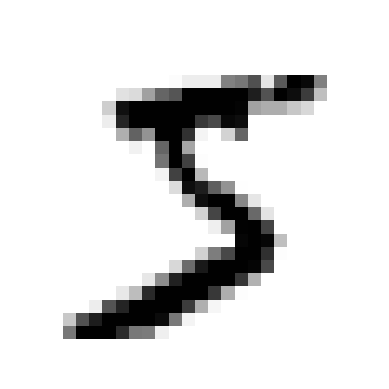

In [4]:
def plot_digit(image_data: np.ndarray) -> None:
    image_data_formatted = image_data.reshape(28, 28)
    plt.imshow(image_data_formatted, cmap="binary")
    plt.axis("off")

plot_digit(X_train[0])
plt.show();

# Exercice 1
Create a model with 97% or accuracy. Hint given: Use the KNeighborsClassifier

In [5]:
# First thing first, try the model directly on the data without tune it
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=N_CPU-1, verbose=2)
pd.Series(knn_scores).describe()

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of   5 | elapsed:   26.7s remaining:   40.0s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   27.1s finished


count    5.000000
mean     0.969283
std      0.000763
min      0.968167
25%      0.969000
50%      0.969333
75%      0.969750
max      0.970167
dtype: float64

Seems pretty good without tune-hyperparameters, but before get to this point, let standartize the data

In [6]:
knn_pipelines = Pipeline([
    ("preprocessing", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

knn_standartize_score = cross_val_score(knn_pipelines, X_train, y_train, cv=5, scoring="accuracy", n_jobs=N_CPU-1, verbose=2)
pd.Series(knn_standartize_score).describe()

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.6s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   25.1s finished


count    5.000000
mean     0.941933
std      0.003516
min      0.936583
25%      0.941083
50%      0.942333
75%      0.943583
max      0.946083
dtype: float64

Let try on these 2 models, the one with the standartize data and the normal one

Remember of the baseline 0.969

In [7]:
generic_param_grid = [{
    "weights": ["uniform", "distance"],
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15]
}]

standartize_param_grid = [{
    "knn__weights": ["uniform", "distance"],
    "knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 9, 11, 13, 15]
}]

In [8]:
model_searched_result = []
for model, param_grid in [(KNeighborsClassifier(), generic_param_grid), (knn_pipelines, standartize_param_grid)]:
    searched_model = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=N_CPU-1)
    searched_model.fit(X_train[:30000], y_train[:30000])
    model_searched_result.append(searched_model)
    print(searched_model.best_params_, searched_model.best_score_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END .................................................... total time=  26.2s
[CV] END .................................................... total time=  20.8s


/Users/mickaelboillaud/DataspellProjects/hand_on_ml/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .................................................... total time=  25.9s
[CV] END .................................................... total time=  20.9s
[CV] END .................................................... total time=  26.1s
[CV] END .................................................... total time=  20.6s
{'n_neighbors': 4, 'weights': 'distance'} 0.9635666666666667
Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] END .................................................... total time=  26.0s


/Users/mickaelboillaud/DataspellProjects/hand_on_ml/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .................................................... total time=  25.8s
{'knn__n_neighbors': 4, 'knn__weights': 'distance'} 0.9352333333333332


Let see which model perform the best on the whole dataset

In [9]:
generic_best_params = model_searched_result[0].best_params_
standartize_best_params = model_searched_result[1].best_params_

In [10]:
knn_clf = KNeighborsClassifier(**generic_best_params)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=N_CPU-1, verbose=2)
pd.Series(knn_scores).describe()

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


[CV] END .................................................... total time=  25.3s
[CV] END .................................................... total time=  24.7s
[CV] END .................................................... total time=  25.4s


[Parallel(n_jobs=11)]: Done   2 out of   5 | elapsed:   25.6s remaining:   38.4s


[CV] END .................................................... total time=  25.6s
[CV] END .................................................... total time=  25.7s
[CV] END .................................................... total time=  25.7s


[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   26.0s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   26.0s finished


count    5.000000
mean     0.971617
std      0.001208
min      0.969917
25%      0.970917
50%      0.972000
75%      0.972250
max      0.973000
dtype: float64

In [11]:
knn_pipelines = Pipeline([
    ("preprocessing", StandardScaler()),
    # Use the generic one as they are the same
    ("knn", KNeighborsClassifier(**generic_best_params))
])

knn_standartize_score = cross_val_score(knn_pipelines, X_train, y_train, cv=5, scoring="accuracy", n_jobs=N_CPU-1, verbose=2)
pd.Series(knn_standartize_score).describe()

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
/Users/mickaelboillaud/DataspellProjects/hand_on_ml/venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .................................................... total time=  20.6s
[CV] END .................................................... total time=  20.6s
[CV] END .................................................... total time=  20.7s
[CV] END .................................................... total time=  20.7s


[Parallel(n_jobs=11)]: Done   2 out of   5 | elapsed:   21.0s remaining:   31.5s


[CV] END .................................................... total time=  24.6s


[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   24.8s remaining:    0.0s
[Parallel(n_jobs=11)]: Done   5 out of   5 | elapsed:   24.8s finished


count    5.000000
mean     0.946383
std      0.002690
min      0.942583
25%      0.945667
50%      0.946333
75%      0.947333
max      0.950000
dtype: float64

## Exercice 2
Shift all image from one pixel up down left and right


In [12]:
DIRECTIONS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def unison_shuffled_copies(data: np.ndarray, label: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    assert len(data) == len(label)
    p = np.random.permutation(len(data))
    return data[p], label[p]

def expand_training_set(data: np.ndarray, label: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    data_augmented = []
    label_augmented = []
    for digit, label in zip(data, label):
        data_augmented.append(digit)
        label_augmented.append(label)
        digit_img_format = digit.reshape(28, 28)
        for direction in DIRECTIONS:
            shifted_digit = shift(digit_img_format, direction)
            data_augmented.append(shifted_digit.reshape(784,))
            label_augmented.append(label)

    return unison_shuffled_copies(np.array(data_augmented), np.array(label_augmented))

X_train_augmented, y_train_augmented = expand_training_set(X_train, y_train)

In [13]:
knn_clf = KNeighborsClassifier(**generic_best_params)
knn_clf.fit(X_train_augmented, y_train_augmented)
knn_scores = knn_clf.score(X_test, y_test)
print(knn_scores)

0.9763
